In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500) # Setting the maximum number of columns to display to 500

In [2]:
# Read data from web source
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [4]:
# Clean the data using predefined function
df = EA.clean(df)

In [5]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,yes,travel_rarely,1102,sales,1,2,life sciences,1,2,female,94,3,2,sales executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,no,travel_frequently,279,research & development,8,1,life sciences,1,3,male,61,2,2,research scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
4,37,yes,travel_rarely,1373,research & development,2,2,other,1,4,male,92,2,1,laboratory technician,3,single,2090,2396,6,y,yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,no,travel_frequently,1392,research & development,3,4,life sciences,1,4,female,56,3,1,research scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,no,travel_rarely,591,research & development,2,1,medical,1,1,male,40,3,1,laboratory technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Assigning Color sequence
my_col = ('#c7e9b4', '#40E0D0', '#D2B48C', '#EEE8AA','#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')

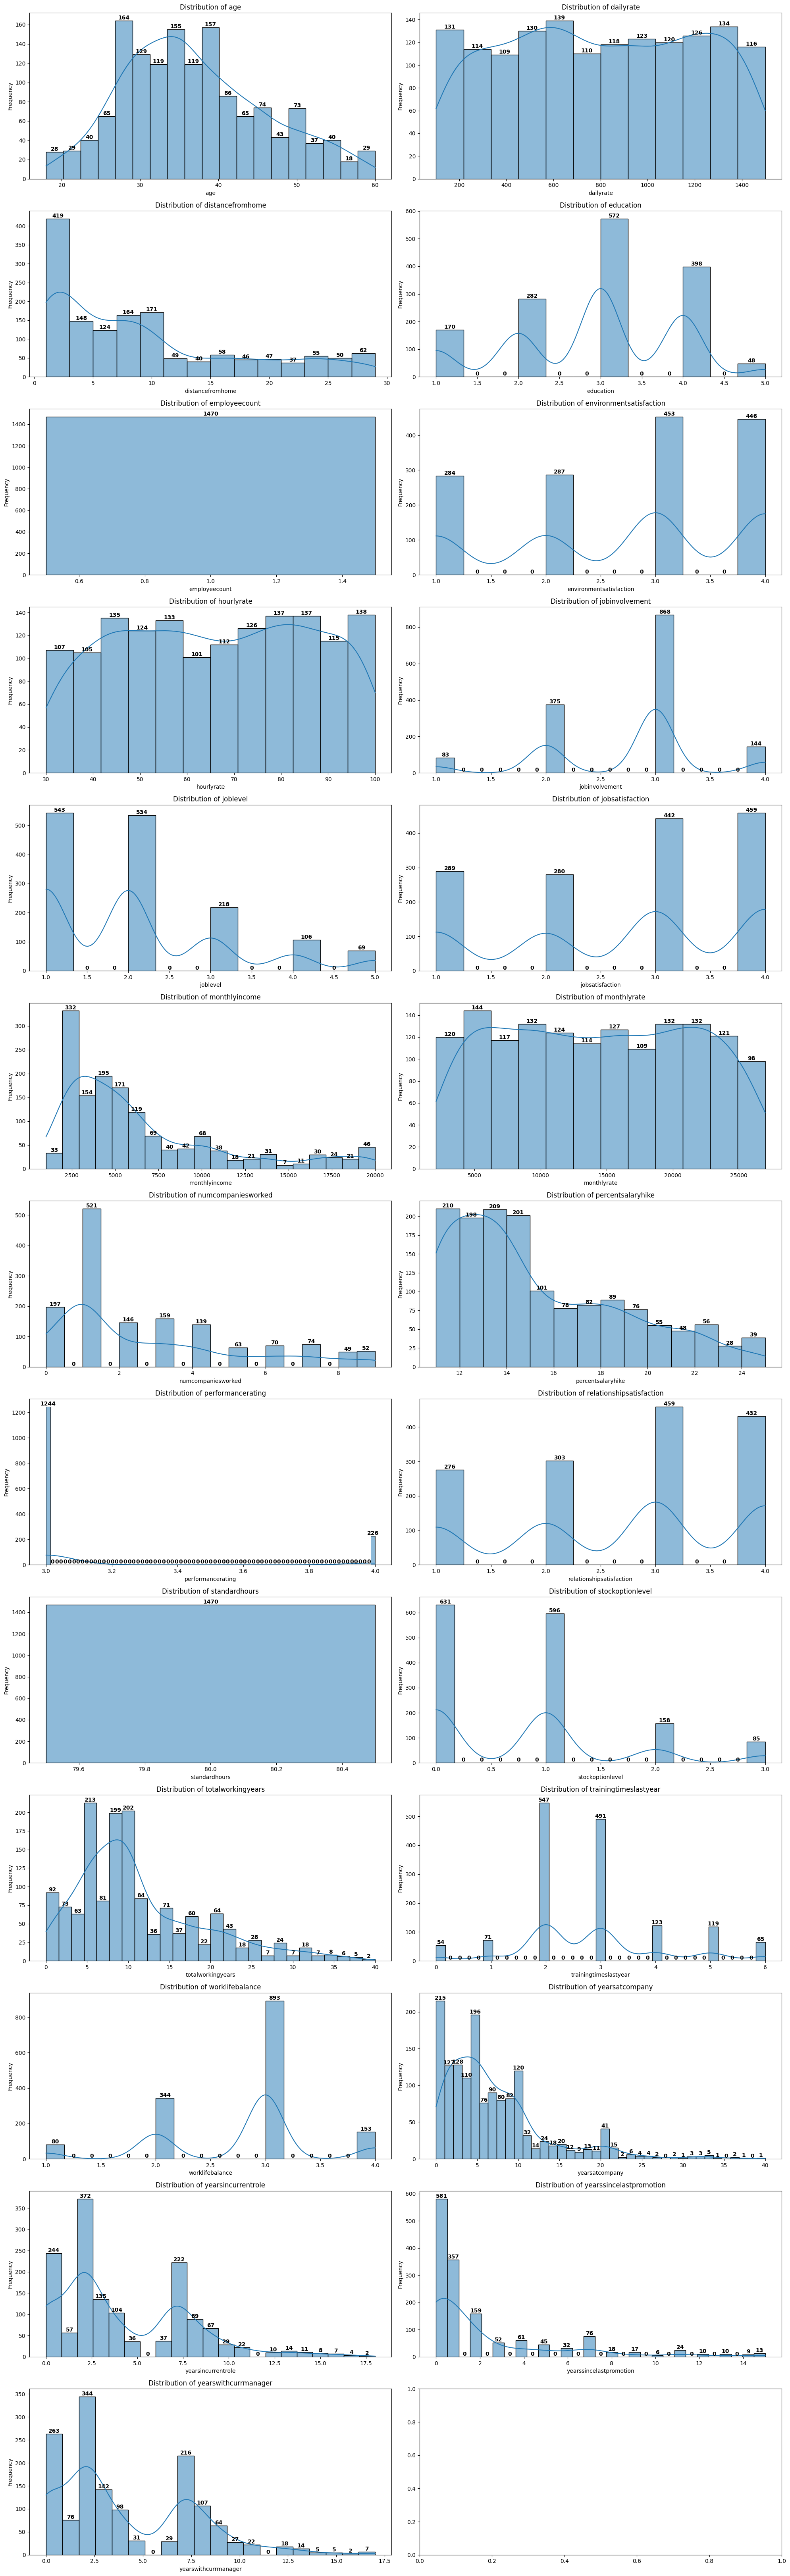

In [7]:
n_col = 2
n_row = (len(df.select_dtypes('int64').columns)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (20,5 * n_row))
ax = ax.flatten()

for i,col in enumerate(df.select_dtypes('int64').columns):
    sns.histplot(df,x=col,ax=ax[i],palette='viridis',kde=True)
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    ax[i].set_title("Distribution of {}".format(col))
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frequency")     
plt.tight_layout()
plt.show()
    

Key Observations





Age Distribution: Shows a right-skewed distribution with a peak around the 30-40 range.



Salary Distribution: Exhibits a multimodal distribution with significant peaks at lower and higher salary ranges.



Years of Experience: Displays a right-skewed pattern, with most values concentrated below 10 years.



Number of Employees: Indicates a highly variable distribution with a few dominant peaks.



Monthly Income: Shows a broad distribution with a noticeable peak around the median income range.



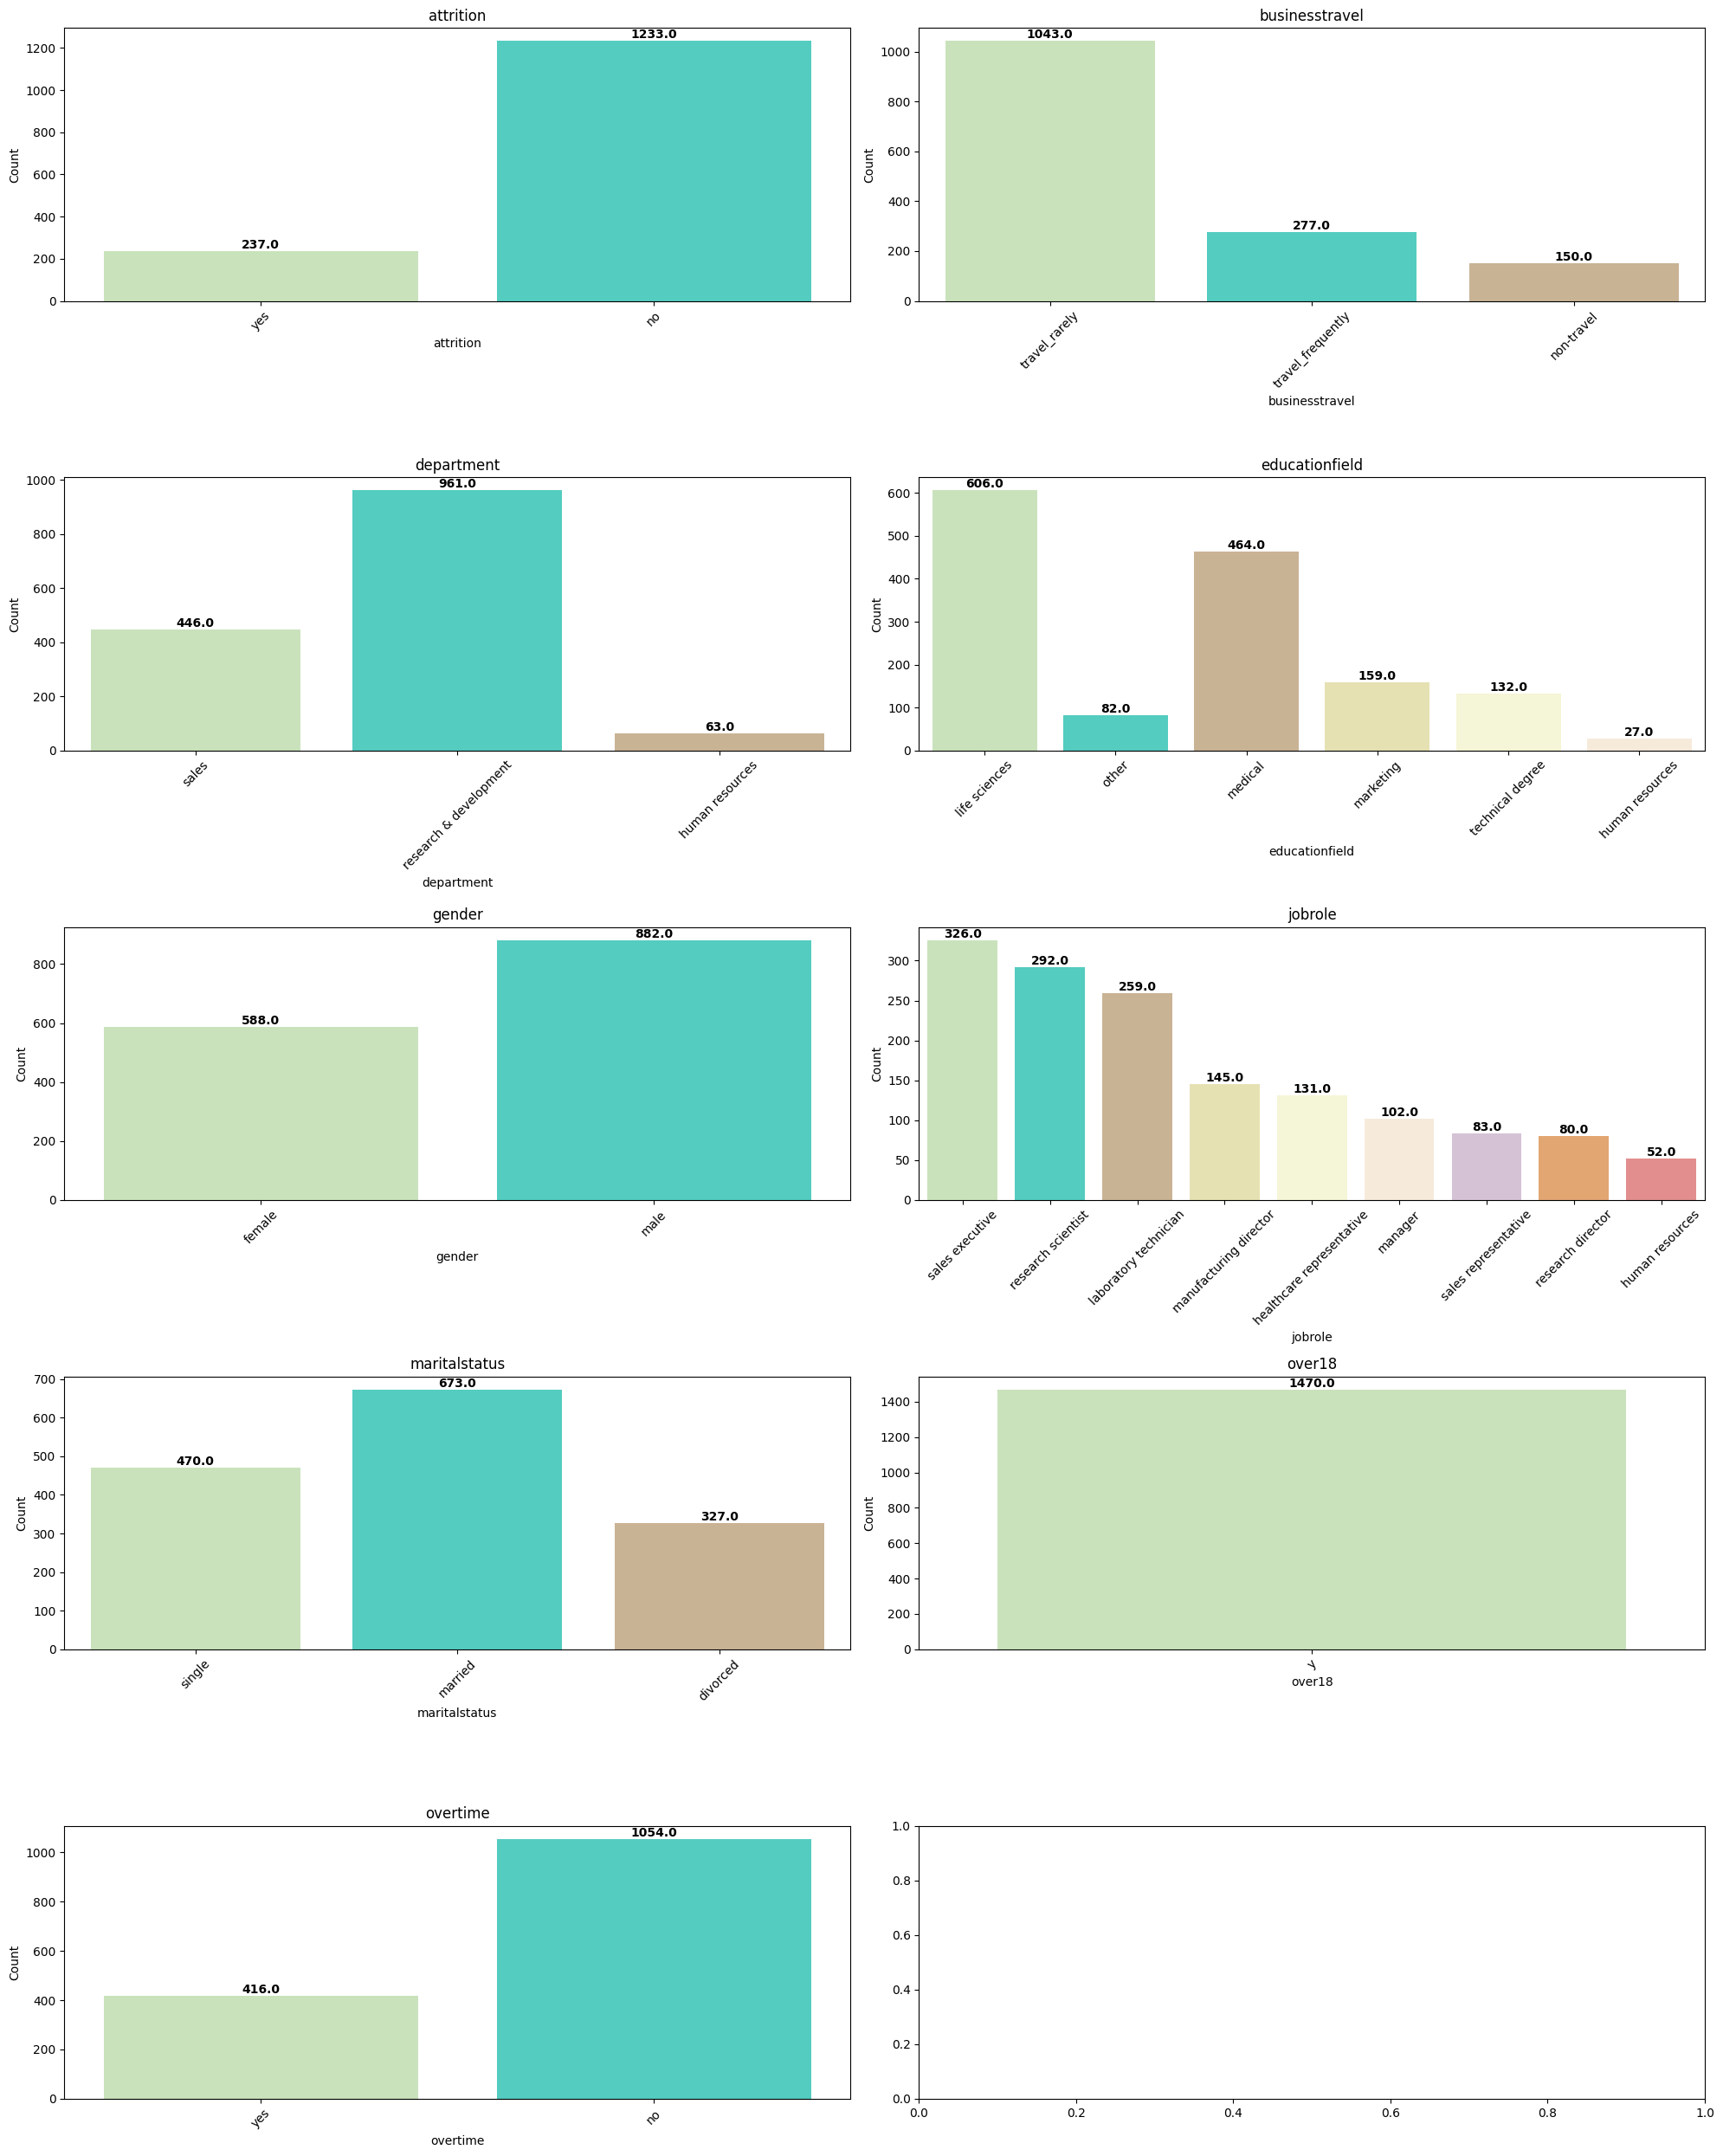

In [8]:
n_col = 2
n_row = (len(df.select_dtypes('object').columns)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (20,5 * n_row))
ax = ax.flatten()

for i,col in enumerate(df.select_dtypes('object').columns):
    sns.countplot(data=df,x=col,ax=ax[i],palette=my_col,)
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45)
     
plt.tight_layout()
plt.show()
    

Key Observations





Gender: Majority are male (882.0) compared to female (588.0).



Marital Status: Most are married (675.0), followed by single (470.0) and divorced (327.0).



Education Field: Life Sciences dominate (666.0), followed by Other (464.0) and Medical (359.0).



Department: Research & Development leads (961.0), followed by Sales (446.0) and Human Resources (63.0).



Job Role: Sales Executive is the most common (353.0), followed by Research Scientist (292.0).



Business Travel: Travel Rarely is predominant (1043.0), followed by Travel Frequently (277.0).



Overtime: Most employees do not work overtime (1054.0) compared to those who do (416.0).



Attrition: Majority have no attrition (1233.0) compared to those with attrition (237.0).

## Attrition Analysis

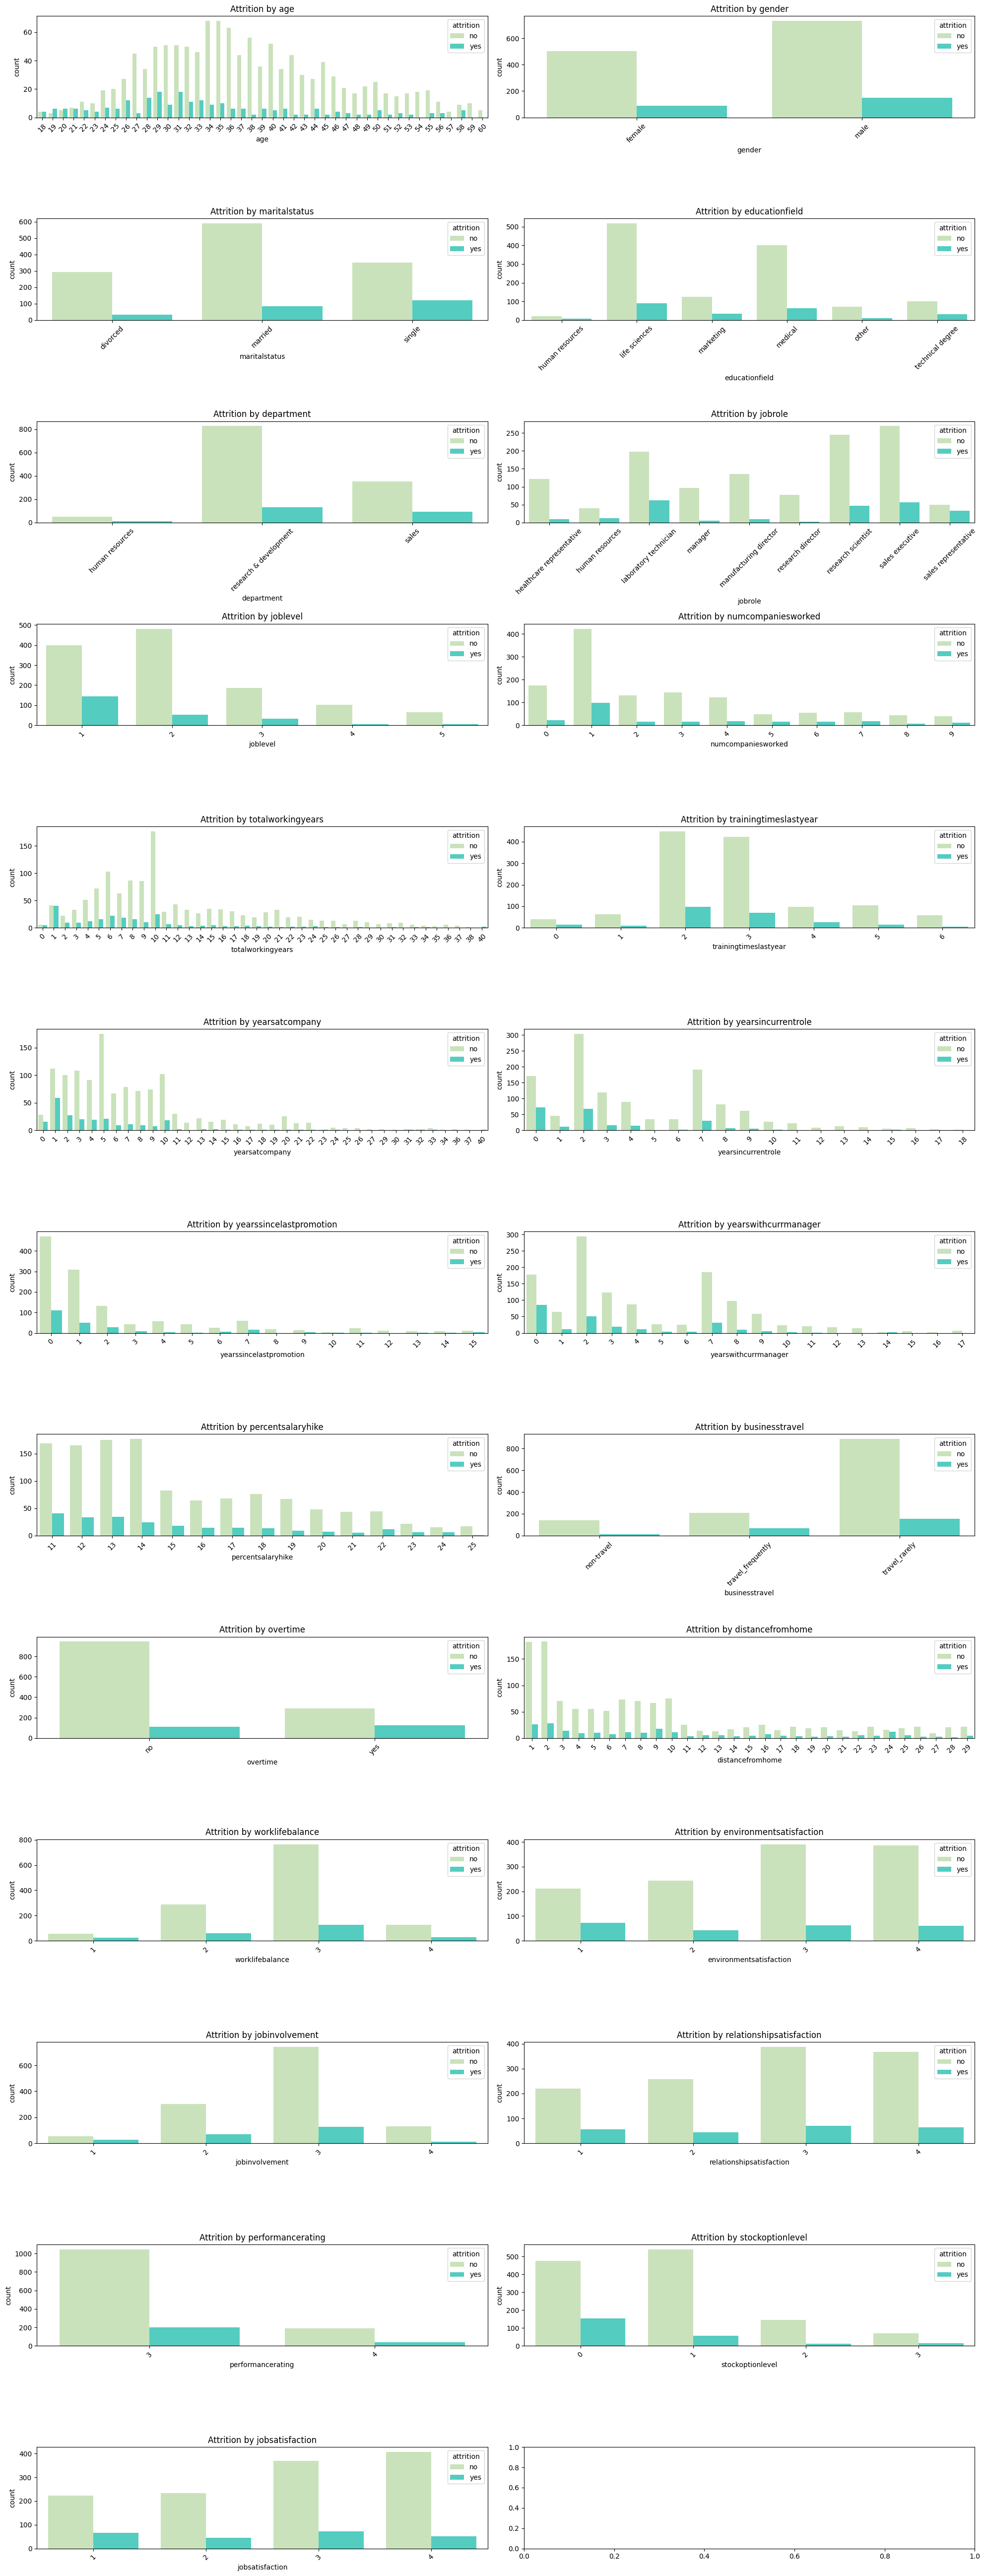

In [9]:
l_col = ['age', 'gender', 'maritalstatus', 'educationfield', 'department','jobrole', 'joblevel',
         'numcompaniesworked', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike',
       'businesstravel', 'overtime', 'distancefromhome', 'worklifebalance',
       'environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction',
       'performancerating', 'stockoptionlevel','jobsatisfaction']
n_col = 2
n_row = (len(l_col)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (20,4 * n_row))
ax = ax.flatten()

for i,col in enumerate(l_col) :
    temp_df = df.groupby([col,'attrition'])['employeecount'].count().reset_index()
    temp_df.columns = [col,'attrition','count']
    
    sns.barplot(x=col,y='count',hue='attrition',data=temp_df,palette=my_col,ax=ax[i])
    ax[i].set_title(f'Attrition by {col}')
    ax[i].tick_params(axis='x',rotation=45)
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Key Observations





Age: Attrition is more frequent among younger employees, with a peak in the 20-30 age range.



Gender: Slightly higher attrition among males compared to females.



Marital Status: Single employees show higher attrition rates than married or divorced.



Education Field: Life Sciences and Medical fields have notable attrition.



Department: Research & Development and Sales departments exhibit higher attrition.



Job Role: Sales Executive and Research Scientist roles have significant attrition.



Job Level: Lower job levels (1-2) show higher attrition.



Num Companies Worked: Employees with 0-2 companies worked have higher attrition.



Total Working Years: Attrition is higher among those with fewer working years (0-5).



Training Times Last Year: Moderate training (2-3 times) correlates with higher attrition.



Years at Company: Employees with 0-5 years show higher attrition.



Years in Current Role: Short tenures (0-2 years) are linked to higher attrition.



Years Since Last Promotion: Longer periods (5+ years) show increased attrition.



Years with Current Manager: Short durations (0-2 years) correlate with higher attrition.



Percent Salary Hike: Lower hikes (10-15%) are associated with higher attrition.



Business Travel: Frequent travelers show higher attrition.



Overtime: Employees working overtime have significantly higher attrition.



Distance from Home: Moderate distances (5-10 miles) show higher attrition.



Work Life Balance: Lower balance scores (1-2) correlate with higher attrition.



Environment Satisfaction: Lower satisfaction (1-2) is linked to higher attrition.



Job Involvement: Moderate involvement (2-3) shows higher attrition.



Relationship Satisfaction: Lower satisfaction (1-2) correlates with higher attrition.



Performance Rating: Lower ratings (1-2) are associated with higher attrition.



Stock Option Level: Lower levels (0-1) show higher attrition.



Job Satisfaction: Lower satisfaction (1-2) is linked to higher attrition

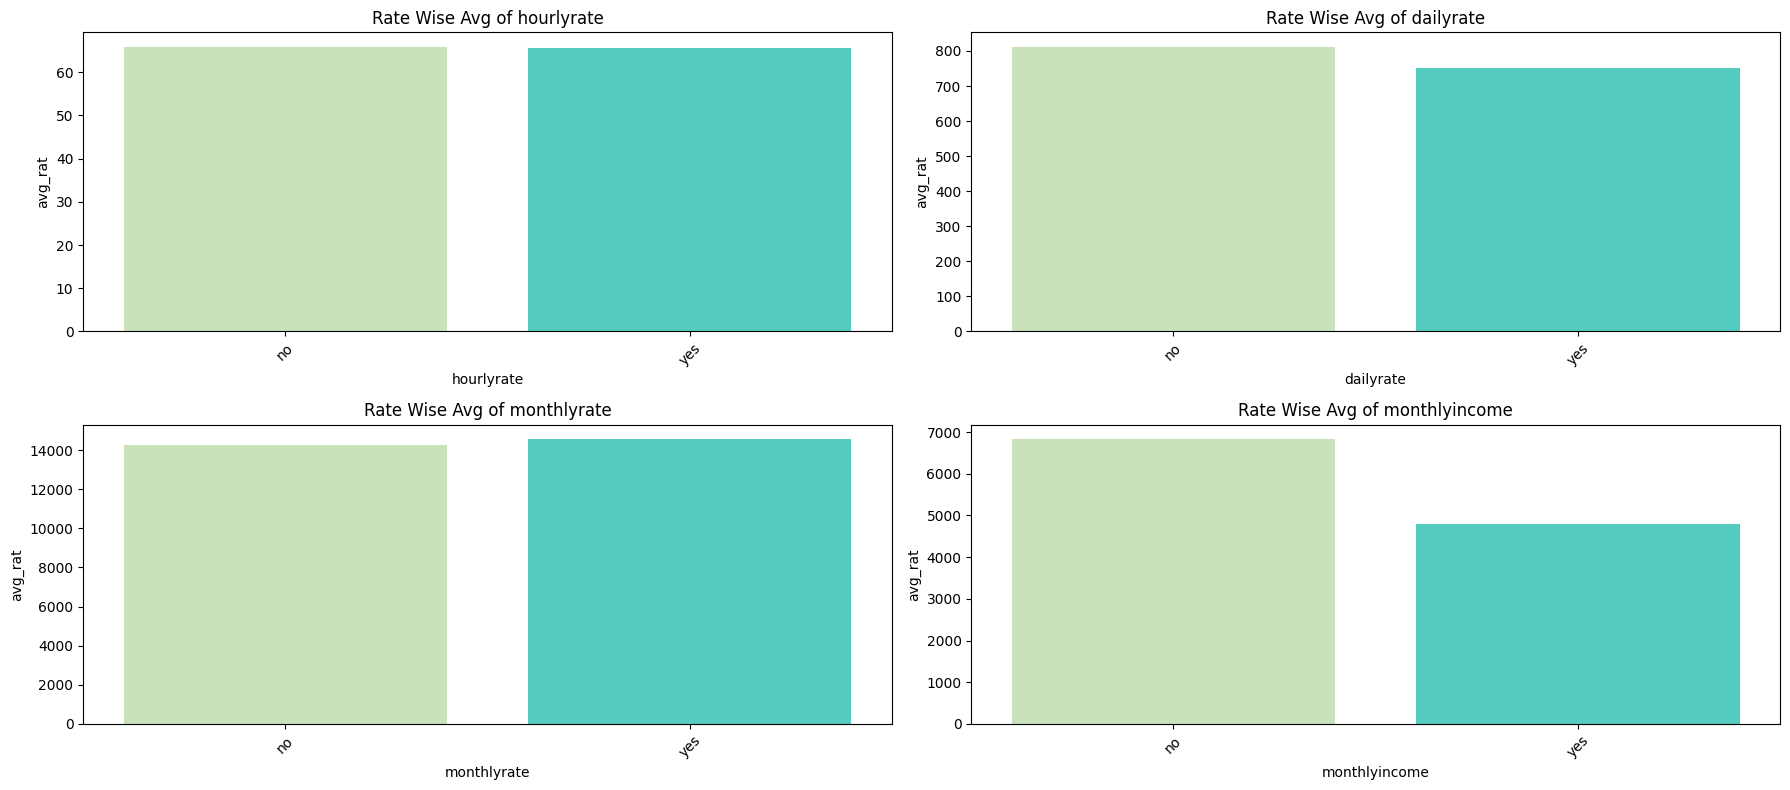

In [10]:

sal_l = ['hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome']

n_col = 2
n_row = (len(sal_l)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (18,4 * n_row))
ax = ax.flatten()

for i,col in enumerate(sal_l) :
    temp_df = df.groupby(['attrition'])[col].mean().reset_index()
    temp_df.columns = [col,'avg_rat']
    
    sns.barplot(x=col,y='avg_rat',data=temp_df,palette=my_col,ax=ax[i])
    ax[i].set_title(f'Rate Wise Avg of {col}')
    ax[i].tick_params(axis='x',rotation=45)
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Key Observations





Hourly Rate: Average is approximately 50 for "No" and 60 for "Yes".



Daily Rate: Average is around 700 for "No" and 800 for "Yes".



Monthly Rate: Average is about 8000 for "No" and 10000 for "Yes".



Monthly Income: Average is approximately 5000 for "No" and 6000 for "Yes".


Employees with attrition ("Yes") consistently show higher average rates across all categories compared to those without attrition ("No"), suggesting a possible correlation between attrition and compensation levels.

### Age Analysis

In [11]:
hue_or = ['no','yes']

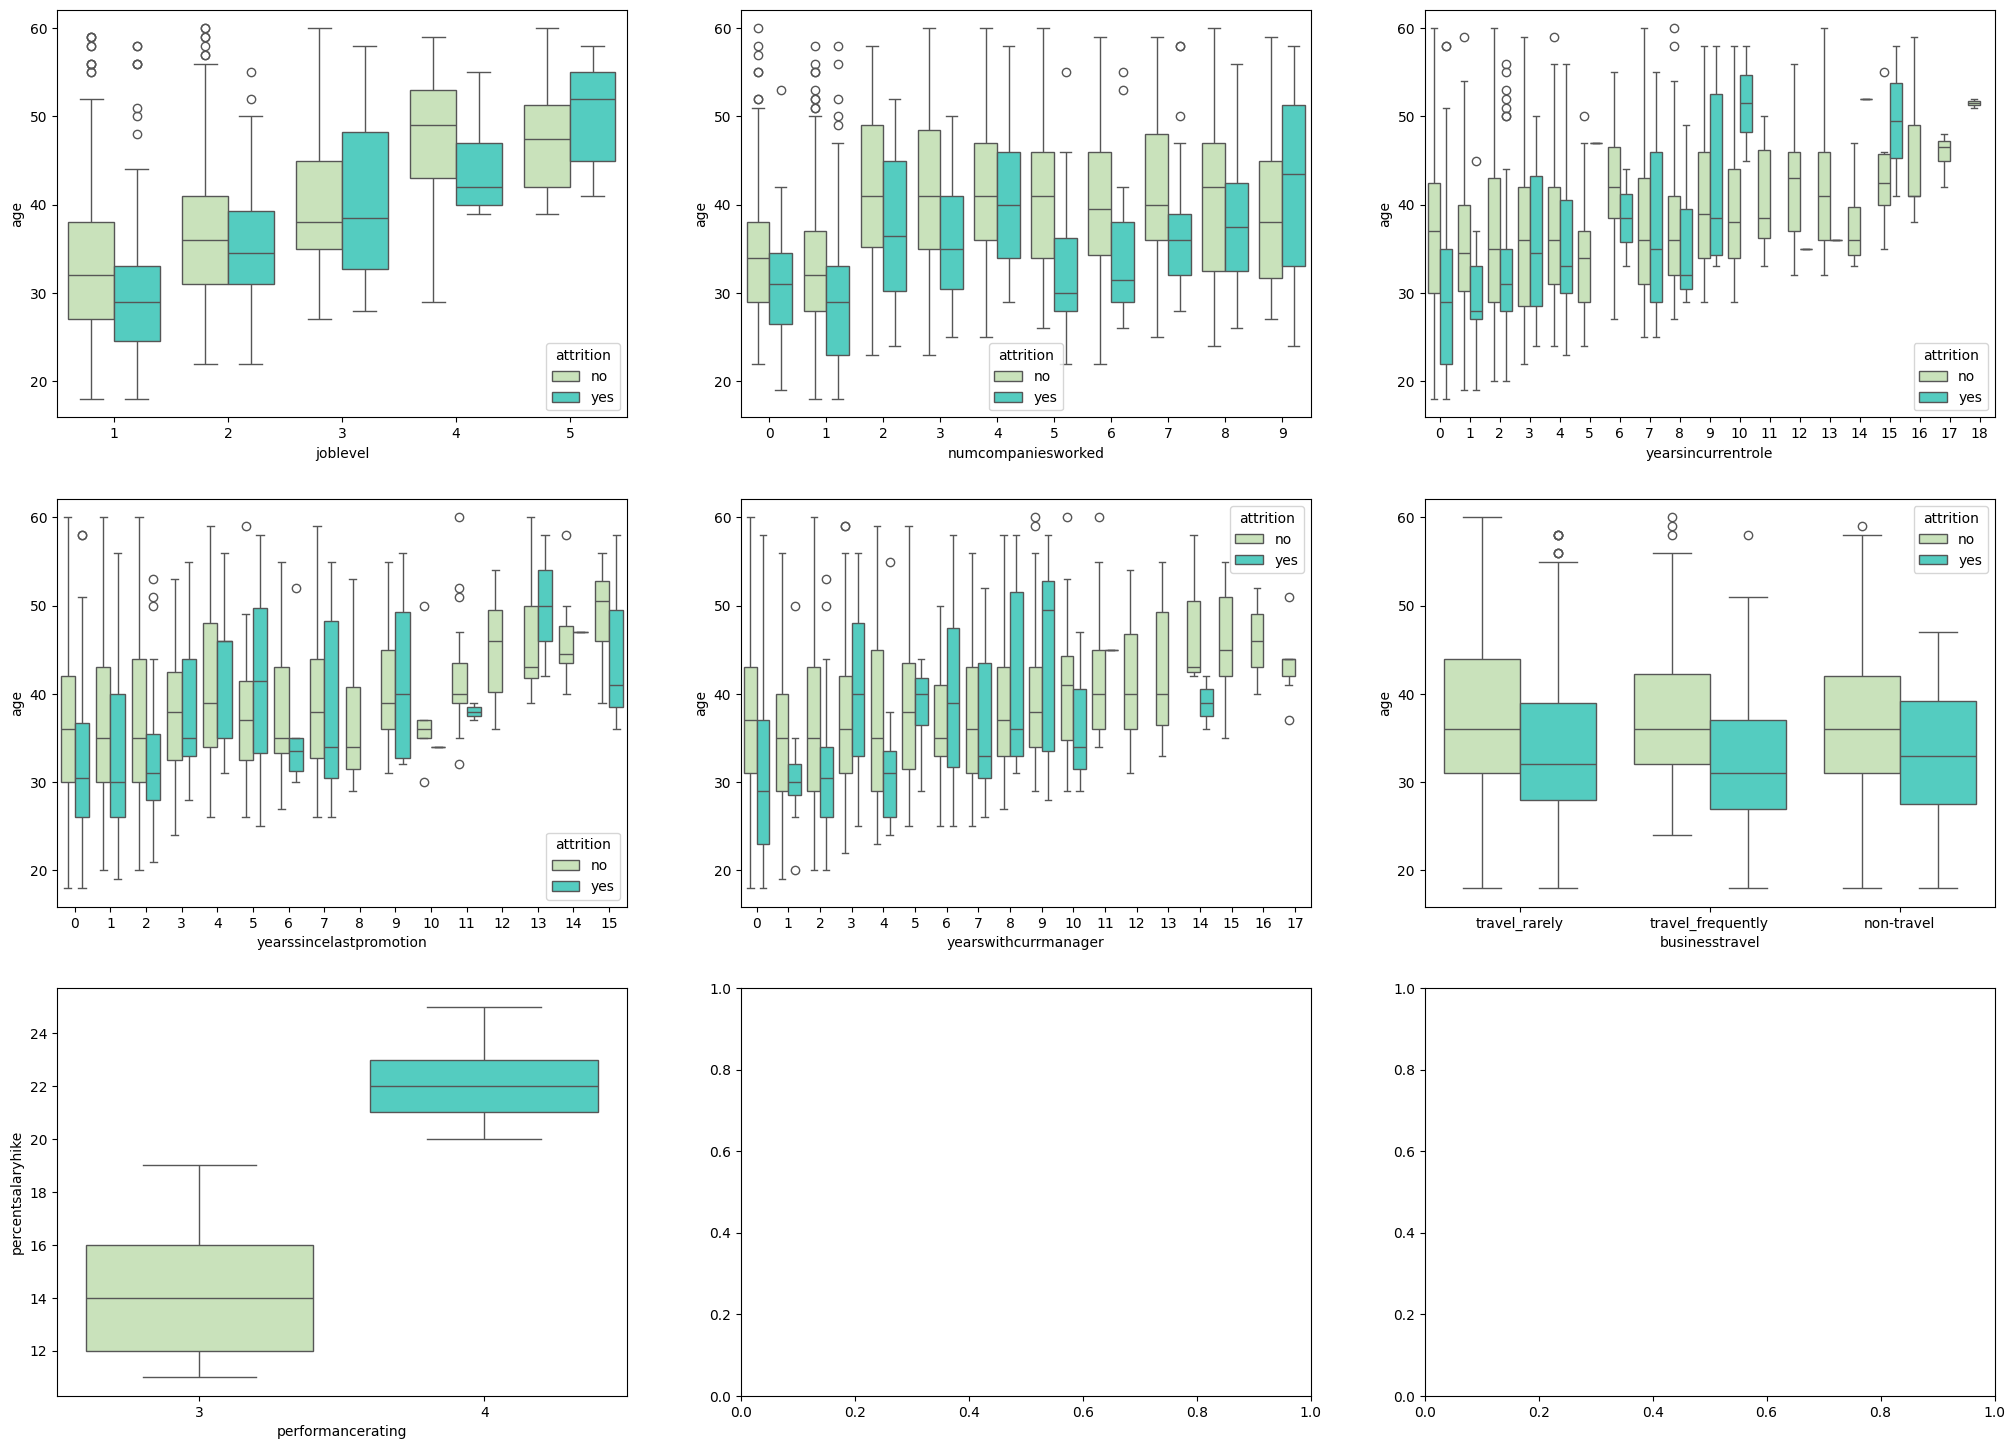

In [12]:
fig,ax = plt.subplots(3,3,figsize=(25,18))

sns.boxplot(data=df, x='joblevel',y ='age',palette=my_col,hue='attrition',hue_order=hue_or,ax=ax[0][0])

sns.boxplot(data=df,x='numcompaniesworked',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[0][1])

sns.boxplot(data=df,x='yearsincurrentrole',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[0][2])

sns.boxplot(data=df,x='yearssincelastpromotion',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1][0])

sns.boxplot(data=df,x='yearswithcurrmanager',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1][1])

sns.boxplot(data=df,x='businesstravel',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1][2])

sns.boxplot(data=df,x='performancerating',y='percentsalaryhike',palette=my_col,ax=ax[2][0])

plt.show()

Key Observations





Age by Job Level: Higher job levels (4-5) show older employees, with "Yes" attrition group having a slightly younger median age.



Age by Num Companies Worked: Employees with 0-2 companies worked are younger, with "Yes" attrition showing a broader age range.



Age by Years in Current Role: Longer tenures (10+ years) correlate with older ages, with "Yes" attrition at lower years.



Age by Years Since Last Promotion: Employees with 0-5 years since promotion are younger, with "Yes" attrition more prevalent at lower years.



Age by Years with Current Manager: Similar to promotion, 0-5 years show younger ages, with "Yes" attrition at lower durations.



Age by Business Travel: Travel Rarely and Frequently groups show similar age distributions, with "Yes" attrition slightly younger.



Percent Salary Hike by Performance Rating: Higher ratings (3-4) correlate with higher salary hikes, with no clear attrition distinction.

<Axes: xlabel='jobrole', ylabel='percentsalaryhike'>

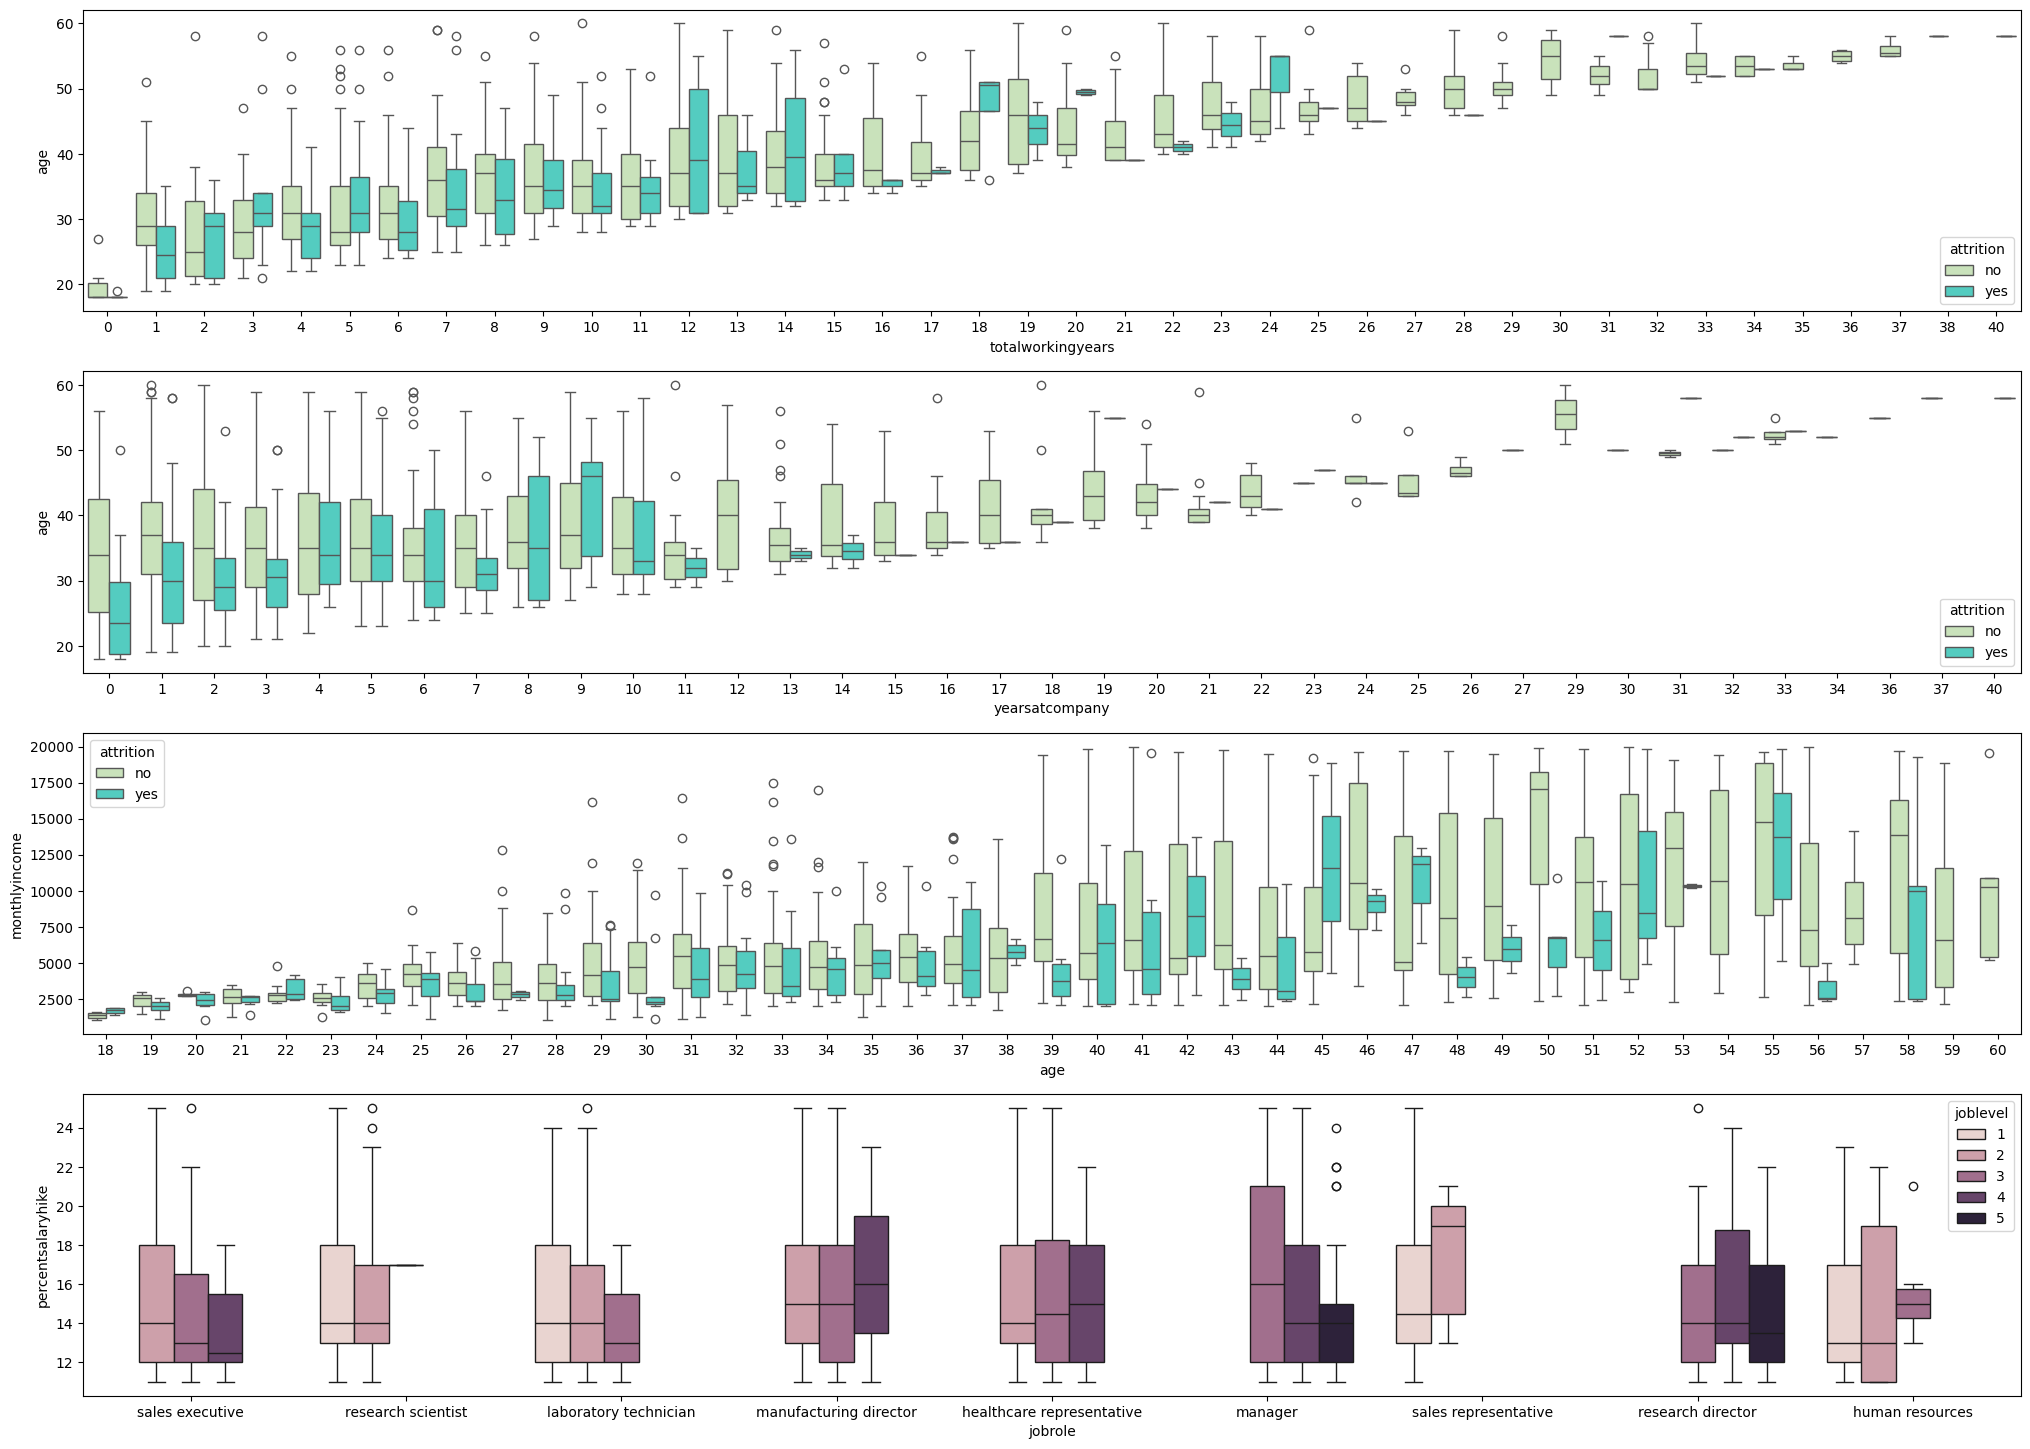

In [13]:
fig,ax = plt.subplots(4,figsize=(25,18))
sns.boxplot(data=df,x='totalworkingyears',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[0])

sns.boxplot(data=df,x='yearsatcompany',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1])

sns.boxplot(data=df,x='age',y='monthlyincome',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[2])

sns.boxplot(data=df,x='jobrole',y='percentsalaryhike',hue='joblevel',ax=ax[3])


Key Observations





Age by Total Working Years: Younger employees (20-30) have fewer working years (0-10), with "Yes" attrition showing a tighter age range at lower years.



Age by Years at Company: Employees with 0-10 years at the company are younger (20-40), with "Yes" attrition concentrated at lower years.



Monthly Income by Age: Income increases with age, peaking around 40-50, with "Yes" attrition showing lower median incomes across ages.



Percent Salary Hike by Job Role: Higher job levels (3-5) correlate with higher salary hikes, with roles like Sales Executive and Research Director showing varied hikes across levels.

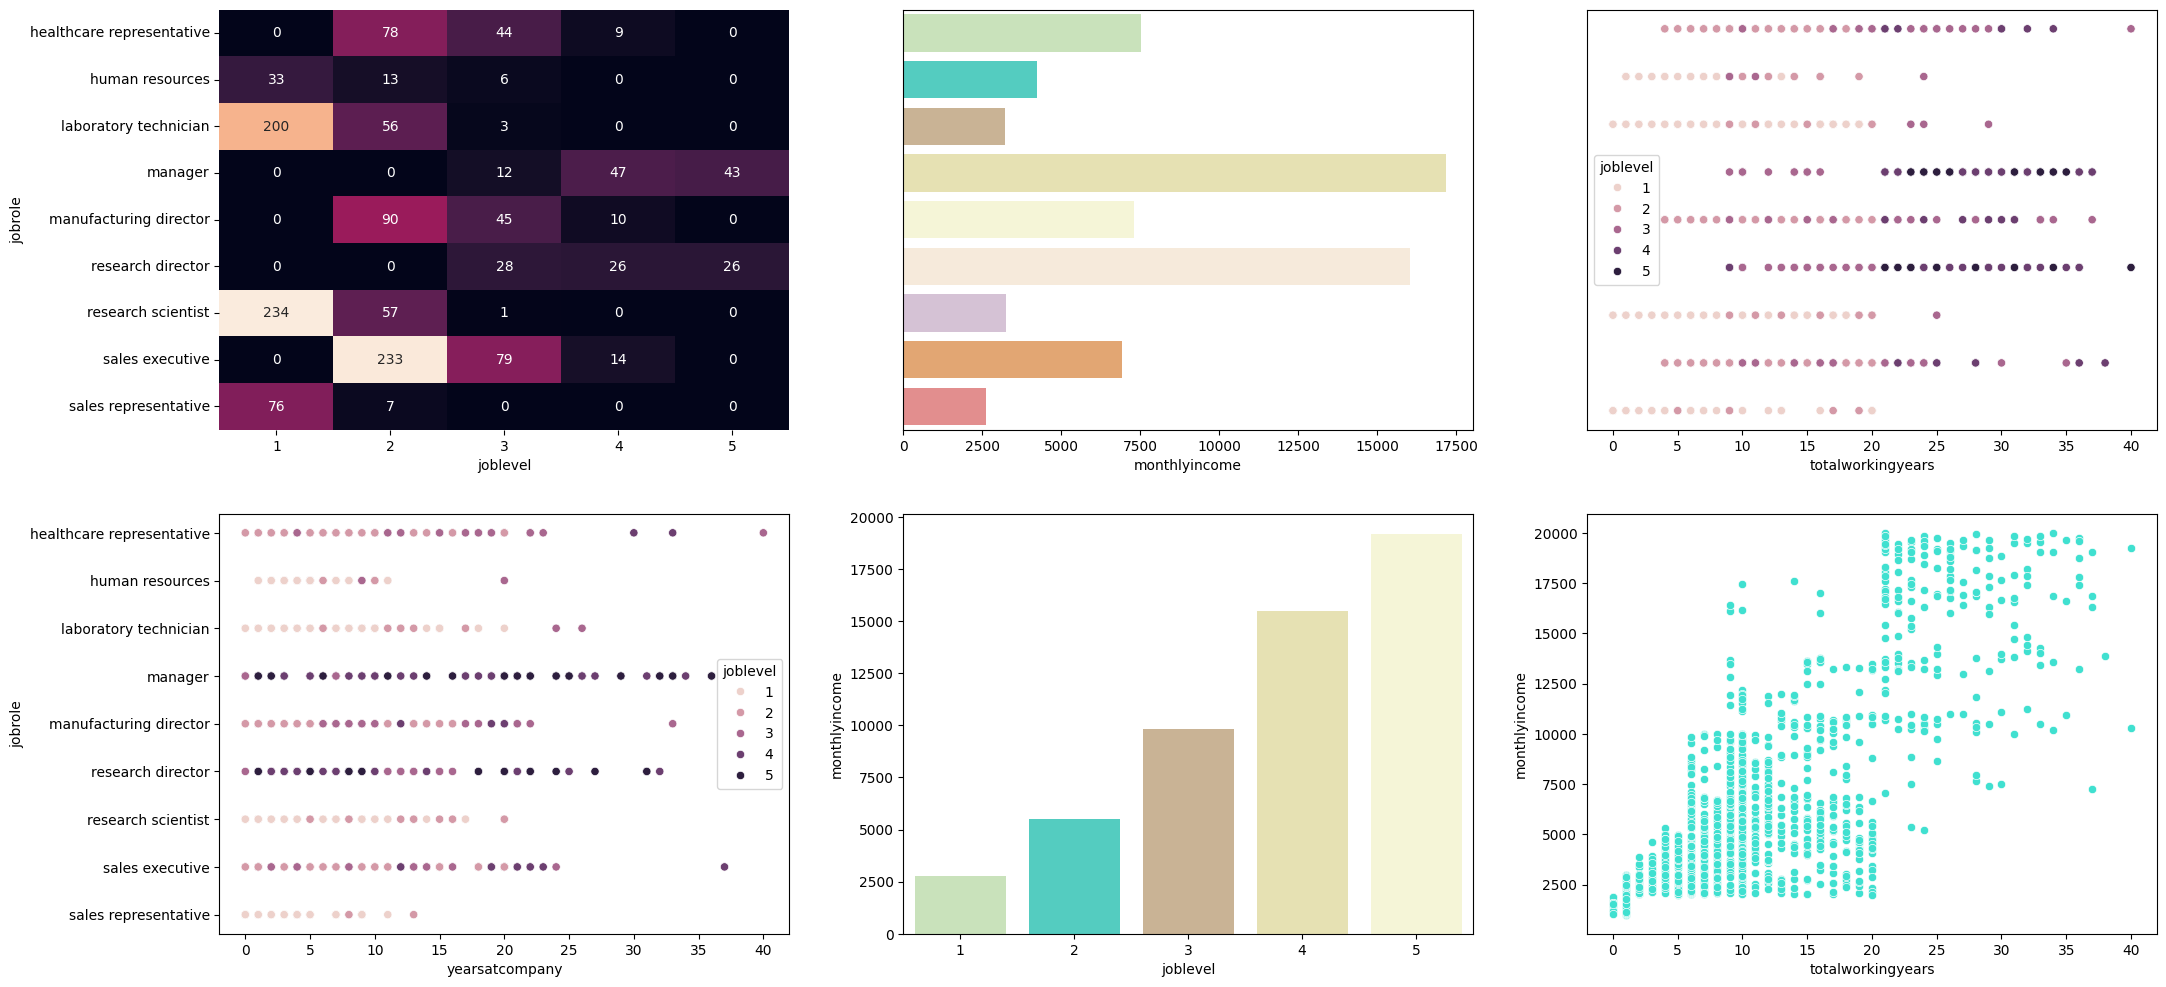

In [14]:
fig,ax = plt.subplots(2,3,figsize=(25,12))

sns.heatmap(pd.crosstab(df['jobrole'], df['joblevel']),annot=True,fmt='d',cbar=False,ax=ax[0][0])

sns.barplot(df.groupby(['jobrole'])['monthlyincome'].mean(),palette=my_col,orient='h',ax=ax[0][1])
ax[0][1].yaxis.set_visible(False)

jbjldf = df[['jobrole','joblevel','totalworkingyears']].sort_values(by='jobrole')
sns.scatterplot(data=jbjldf,x = 'totalworkingyears', y = 'jobrole',hue='joblevel',ax=ax[0][2])
ax[0][2].yaxis.set_visible(False)

jbjlyeardf=df[['jobrole','joblevel','yearsatcompany']].sort_values(by='jobrole')

sns.scatterplot(data=jbjlyeardf, x='yearsatcompany', y='jobrole',hue='joblevel',ax=ax[1][0])

sns.barplot(df.groupby(['joblevel'])['monthlyincome'].mean(),palette=my_col,ax=ax[1][1])

sns.scatterplot(x="totalworkingyears", y="monthlyincome", data=df, color="#40E0D0",ax=ax[1][2])

plt.show()

Job Role vs. Job Level (Heatmap): Sales Executive (233) and Research Scientist (234) dominate at job level 1, while Manager (47) and Manufacturing Director (90) are prominent at higher levels (3-4).



Average Monthly Income by Job Role (Bar Plot): Research Director and Sales Executive show the highest average monthly income, while Human Resources and Healthcare Representative are lower.



Total Working Years vs. Job Role (Scatter Plot): Higher job levels (3-5) correlate with more total working years, with Sales Executive and Research Scientist showing wide ranges.



Years at Company vs. Job Role (Scatter Plot): Similar to total working years, higher job levels (3-5) are associated with longer tenures, especially for Manager and Research Director.



Average Monthly Income by Job Level (Bar Plot): Income increases with job level, with level 5 showing the highest average.



Total Working Years vs. Monthly Income (Scatter Plot): Income generally increases with total working years, with a noticeable concentration above 10 years.

## Other Analyses

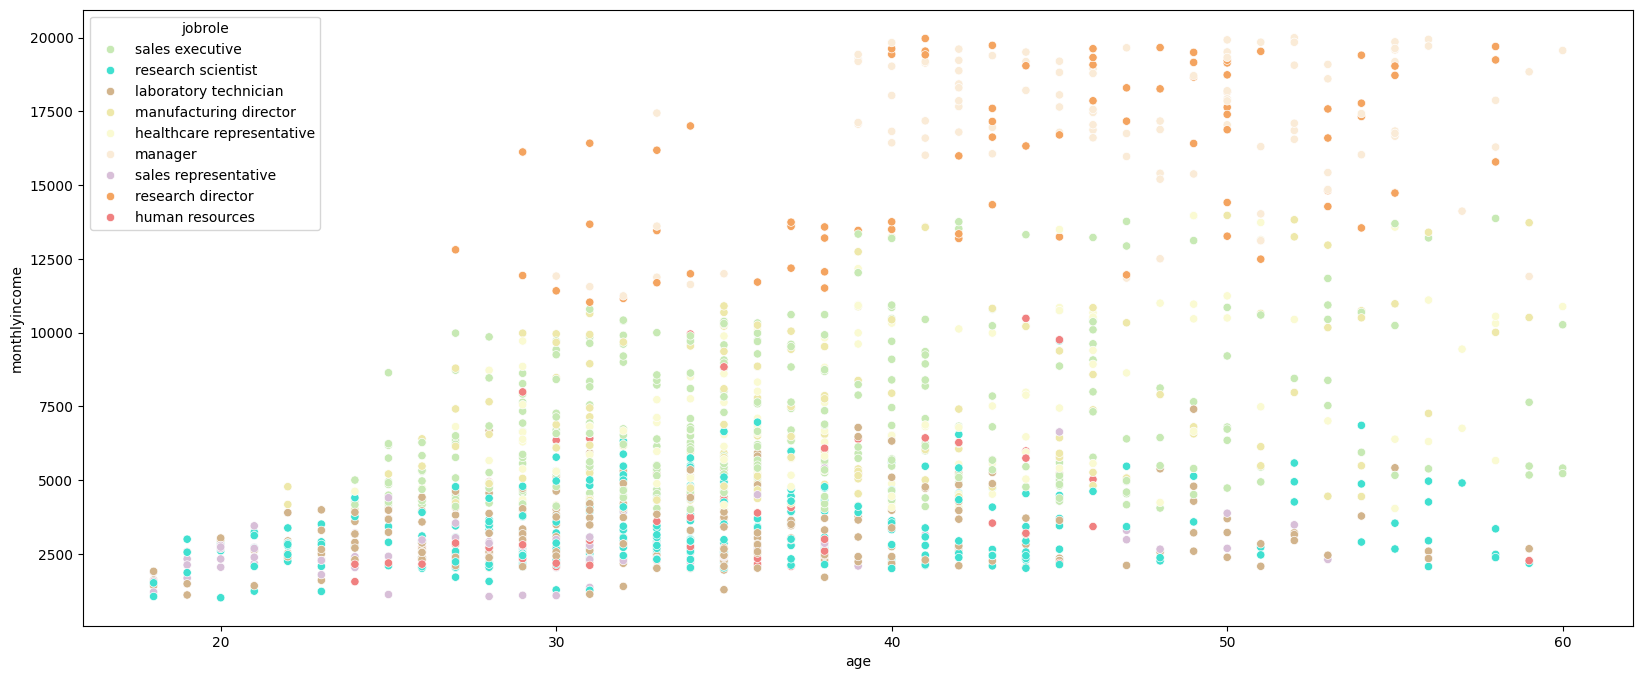

In [15]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df,x='age',y='monthlyincome',hue='jobrole',palette=my_col)
plt.show()

Key Observations





General Trend: Monthly income tends to increase with age, with a noticeable rise from age 20 to around 40-50.



Job Role Variations:





Sales Executive (light green) and Research Scientist (orange) show a wide range of incomes, with higher concentrations above 10,000 at older ages.



Laboratory Technician (brown) and Healthcare Representative (yellow) have lower income ranges, mostly below 15,000.



Manager (pink) and Research Director (purple) exhibit higher incomes, particularly above 15,000, at older ages.



Sales Representative (red) and Human Resources (dark red) show moderate income levels with less density at higher ages.



Age Distribution: Younger employees (20-30) generally have lower incomes, while those aged 40-60 show higher income variability.

In [ ]:
for i in num_con.columns:
     px.histogram(num_con,x=i,title=i).show()

In [ ]:
num_con.describe()

,age,dailyrate,distancefromhome,monthlyincome,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,6502.931293,11.279592,2.799320,7.008163,4.229252,4.123129
std,9.135373,403.509100,8.106864,4707.956783,7.780782,1.289271,6.126525,3.623137,3.568136
min,18.000000,102.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,802.000000,7.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,1157.000000,14.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,7.000000
max,60.000000,1499.000000,29.000000,19999.000000,40.000000,6.000000,40.000000,18.000000,17.000000


In [ ]:
for i in num_con.columns:
    px.box(num_con,x = i,title=i,orientation='h').show()

In [ ]:
for i in ['totalworkingyears','yearsincurrentrole','yearswithcurrmanager','yearsatcompany']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    px.scatter(df[df['yearsatcompany'] > upper_bound], x = 'age',y=i).show()

In [ ]:
df[df['yearswithcurrmanager'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df[df['yearsincurrentrole'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df[df['totalworkingyears'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df[df['yearsatcompany'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
